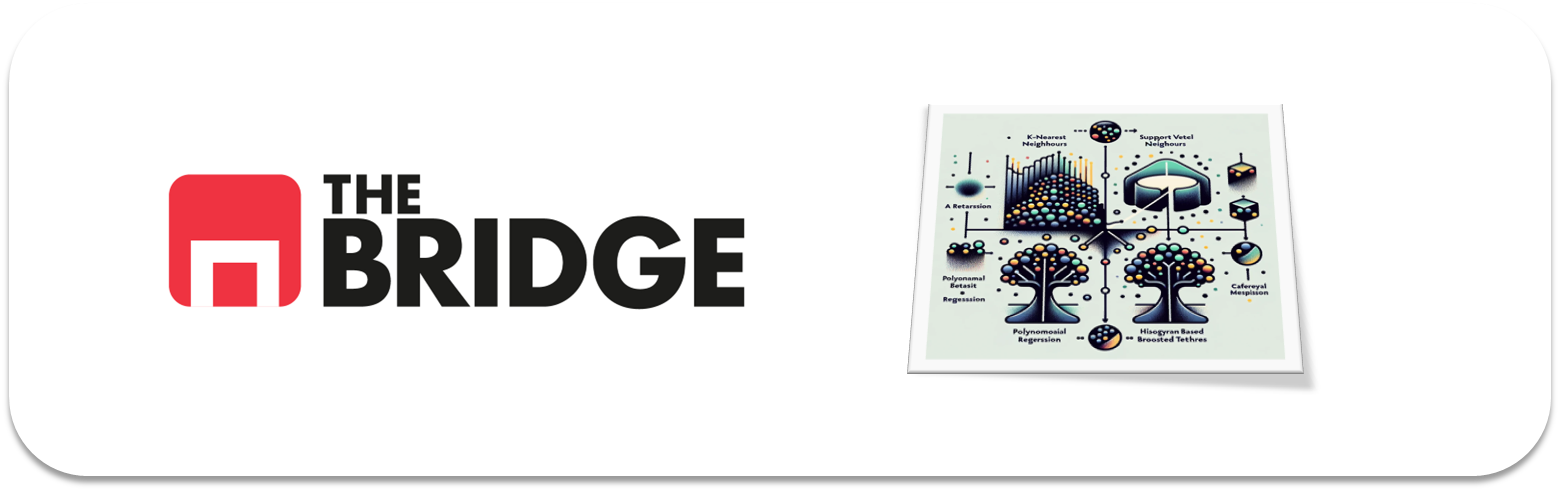

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, r'C:\Users\lupep\Desktop\THE BRIDGE\Ds-Online-PabloBaro\Team_Challenge_ToolBox')
import toolbox_ML as tb
import bootcampviztools as bt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("data/wines_dataset.csv", delimiter='|')

In [3]:
df. head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
info = tb.describe_df(df)
display(info) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,106,187,89,316,214,135,276,998,108,111,111,7,2
CARDIN (%),1.63,2.88,1.37,4.86,3.29,2.08,4.25,15.36,1.66,1.71,1.71,0.11,0.03


In [6]:
# Verificar quality
print(f"\n QUALITY (Clasificación):")
print(f"   Tipo: {df['quality'].dtype}")
print(f"   Valores únicos: {df['quality'].nunique()}")
print(f"   Valores: {sorted(df['quality'].unique())}")


 QUALITY (Clasificación):
   Tipo: int64
   Valores únicos: 7
   Valores: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


In [7]:
# Verificar alcohol
print(f"\n ALCOHOL (Regresión):")
print(f"   Tipo: {df['alcohol'].dtype}")
print(f"   Valores únicos: {df['alcohol'].nunique()}")
print(f"   Rango: {df['alcohol'].min():.2f} - {df['alcohol'].max():.2f}")


 ALCOHOL (Regresión):
   Tipo: float64
   Valores únicos: 111
   Rango: 8.00 - 14.90


### #2 Modelado para clasificación

In [110]:

print(" DISTRIBUCIÓN DEL TARGET - QUALITY")


# Distribución
print("\n Distribución de quality:")
print(df['quality'].value_counts().sort_index())

print("\n Porcentajes:")
print(df['quality'].value_counts(normalize=True).sort_index() * 100)





 DISTRIBUCIÓN DEL TARGET - QUALITY

 Distribución de quality:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

 Porcentajes:
quality
3     0.461752
4     3.324611
5    32.907496
6    43.650916
7    16.607665
8     2.970602
9     0.076959
Name: proportion, dtype: float64


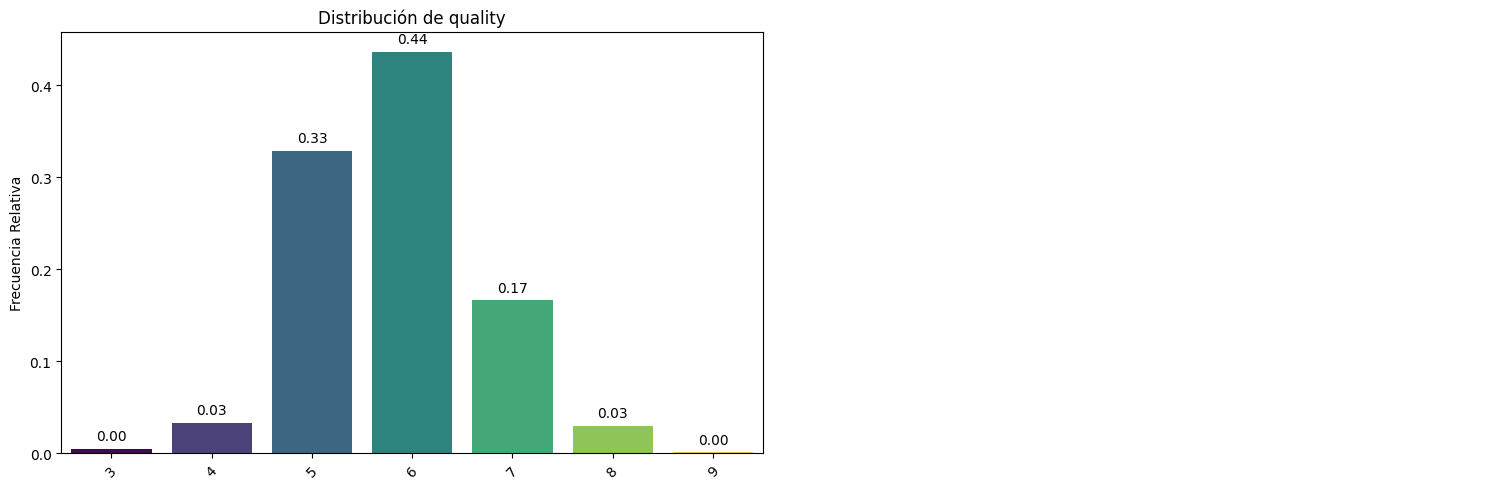

In [9]:
# Visualización
bt.pinta_distribucion_categoricas(
    df,
    columnas_categoricas=['quality'],
    relativa=True,
    mostrar_valores=True
)

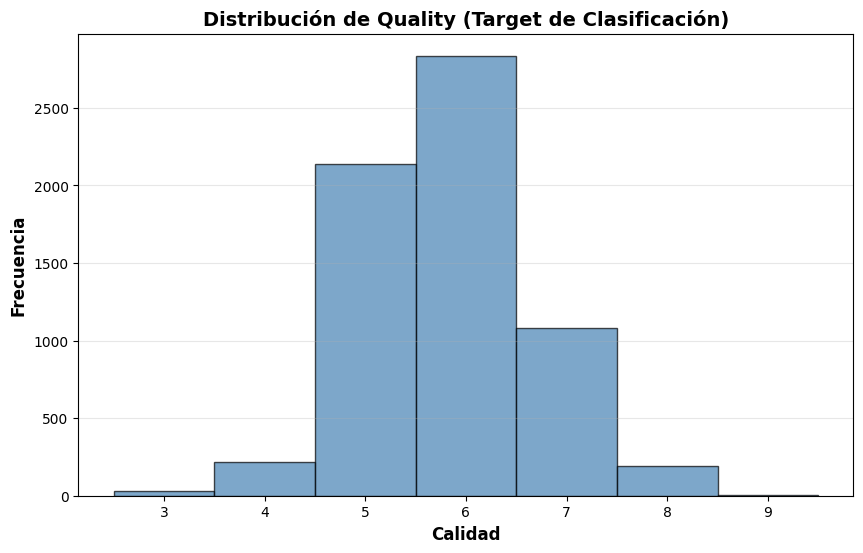




DISTRIBUCIÓN:
  • Mayoría de vinos: calidad 5-6 (~70%)
  • Pocos vinos con calidad baja (3-4) o alta (8-9)
  • Forma de campana (distribución normal)

DESBALANCEO:
  • Clases 5 y 6 dominan
  • Clases extremas muy raras
  • Necesitaremos balanceo (SMOTE o class_weight)

TIPO DE PROBLEMA:
  • Clasificación MULTICLASE
  • Ordinal (3 < 5 < 7)
  • Métrica: Recall medio



In [10]:
# Histograma adicional
plt.figure(figsize=(10, 6))
plt.hist(df['quality'], bins=np.arange(2.5, 10.5, 1), 
         edgecolor='black', color='steelblue', alpha=0.7)
plt.xlabel('Calidad', fontweight='bold', fontsize=12)
plt.ylabel('Frecuencia', fontweight='bold', fontsize=12)
plt.title('Distribución de Quality (Target de Clasificación)', 
          fontweight='bold', fontsize=14)
plt.xticks(range(3, 10))
plt.grid(axis='y', alpha=0.3)
plt.show()

print("""
 

DISTRIBUCIÓN:
  • Mayoría de vinos: calidad 5-6 (~70%)
  • Pocos vinos con calidad baja (3-4) o alta (8-9)
  • Forma de campana (distribución normal)

DESBALANCEO:
  • Clases 5 y 6 dominan
  • Clases extremas muy raras
  • Necesitaremos balanceo (SMOTE o class_weight)

TIPO DE PROBLEMA:
  • Clasificación MULTICLASE
  • Ordinal (3 < 5 < 7)
  • Métrica: Recall medio
""")


In [11]:
print(" DISTRIBUCIÓN DEL TARGET - ALCOHOL")


# Estadísticas
print("\n Estadísticas de alcohol:")
print(df['alcohol'].describe())



 DISTRIBUCIÓN DEL TARGET - ALCOHOL

 Estadísticas de alcohol:
count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64


(2,)


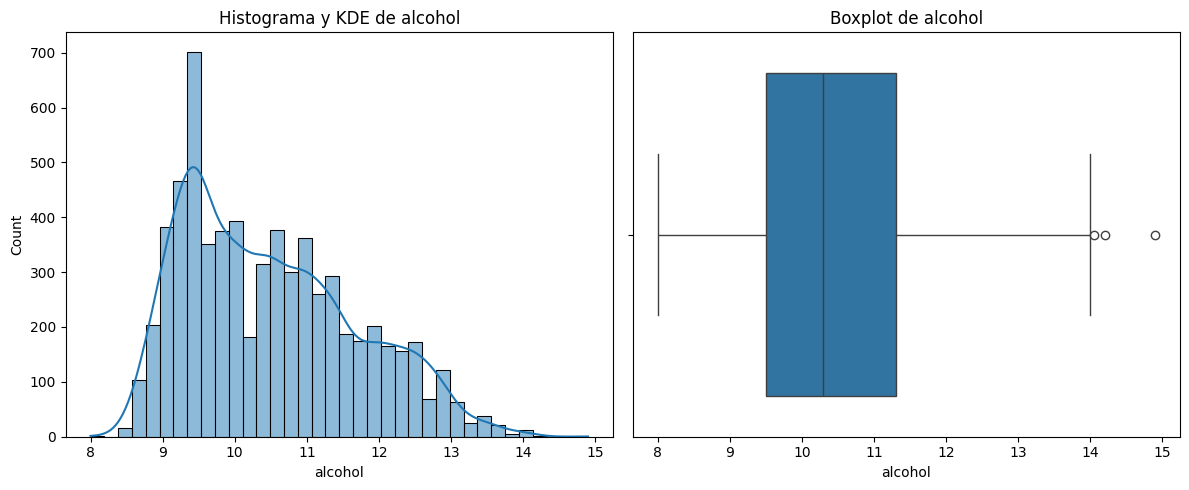


 COMENTARIO - ALCOHOL:

DISTRIBUCIÓN:
  • Rango: 8.0% - 14.9%
  • Media: 10.49%
  • Mediana: 10.30%

CARACTERÍSTICAS:
  • Variable continua (regresión)
  • Posible distribución bimodal
  • Métrica: MAPE (error porcentual)



In [12]:
# Visualización
bt.plot_combined_graphs(df, columns=['alcohol'])

print(f"""
 COMENTARIO - ALCOHOL:

DISTRIBUCIÓN:
  • Rango: {df['alcohol'].min():.1f}% - {df['alcohol'].max():.1f}%
  • Media: {df['alcohol'].mean():.2f}%
  • Mediana: {df['alcohol'].median():.2f}%

CARACTERÍSTICAS:
  • Variable continua (regresión)
  • Posible distribución bimodal
  • Métrica: MAPE (error porcentual)
""")

In [13]:
print(" ASSESSMENT PREVIO")

print(f"""
 PROBLEMA 1: CLASIFICACIÓN (quality)
   • Clases: {df['quality'].nunique()}
   • Desbalanceo: SÍ (mayoría en 5-6)
   • Estrategia: SMOTE + Recall medio
   
 PROBLEMA 2: REGRESIÓN (alcohol)
   • Tipo: Continua
   • Rango: {df['alcohol'].min():.1f}-{df['alcohol'].max():.1f}%
   • Estrategia: MAPE como métrica
""")

# Verificar si hay columna 'class'
if 'class' in df.columns:
    print("\n Alcohol por tipo de vino:")
    print(df.groupby('class')['alcohol'].describe())



 ASSESSMENT PREVIO

 PROBLEMA 1: CLASIFICACIÓN (quality)
   • Clases: 7
   • Desbalanceo: SÍ (mayoría en 5-6)
   • Estrategia: SMOTE + Recall medio

 PROBLEMA 2: REGRESIÓN (alcohol)
   • Tipo: Continua
   • Rango: 8.0-14.9%
   • Estrategia: MAPE como métrica


 Alcohol por tipo de vino:
        count       mean       std  min  25%   50%   75%   max
class                                                         
red    1599.0  10.422983  1.065668  8.4  9.5  10.2  11.1  14.9
white  4898.0  10.514267  1.230621  8.0  9.5  10.4  11.4  14.2


### 2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

PLAN:
   1. Preparación de datos (split, escalado)
   2. KNN como BASELINE (con k=3 y k=5)
   3. Modelos adicionales (Random Forest, Gradient Boosting, Logistic Regression)
   4. Balanceo 
   5. Comparación con validación cruzada
   6. Optimización del mejor modelo
   7. Evaluación final
   8. Análisis de errores
   9. Propuestas de mejora


In [14]:
print("PASO 1: PREPARACIÓN DE DATOS")


# Separar features y target
X = df.drop(['quality', 'class'], axis=1)  # Eliminamos quality (target) y class (categórica)
y = df['quality']

print(f"\n DATASET:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"\n   Columnas de X:")
for i, col in enumerate(X.columns, 1):
    print(f"      {i:2d}. {col}")

print(f"\n TARGET:")
print(f"   Variable: quality")
print(f"   Clases: {sorted(y.unique())}")
print(f"   Número de clases: {y.nunique()}")

PASO 1: PREPARACIÓN DE DATOS

 DATASET:
   Features (X): (6497, 11)
   Target (y): (6497,)

   Columnas de X:
       1. fixed acidity
       2. volatile acidity
       3. citric acid
       4. residual sugar
       5. chlorides
       6. free sulfur dioxide
       7. total sulfur dioxide
       8. density
       9. pH
      10. sulphates
      11. alcohol

 TARGET:
   Variable: quality
   Clases: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
   Número de clases: 7


In [15]:
print("PASO 2: SPLIT TRAIN/TEST ESTRATIFICADO")


# Split 80-20 estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  #  Mantiene proporción de cada clase
)

print(f"\n Split realizado:")
print(f"   Train: {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test: {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")


PASO 2: SPLIT TRAIN/TEST ESTRATIFICADO

 Split realizado:
   Train: 5,197 muestras (80.0%)
   Test: 1,300 muestras (20.0%)


In [16]:
# Verificar estratificación
print(f"\n Verificación de estratificación:")
print(f"\n   Original:")
print(y.value_counts(normalize=True).sort_index() * 100)

print(f"\n   Train:")
print(y_train.value_counts(normalize=True).sort_index() * 100)

print(f"\n   Test:")
print(y_test.value_counts(normalize=True).sort_index() * 100)



 Verificación de estratificación:

   Original:
quality
3     0.461752
4     3.324611
5    32.907496
6    43.650916
7    16.607665
8     2.970602
9     0.076959
Name: proportion, dtype: float64

   Train:
quality
3     0.461805
4     3.328844
5    32.903598
6    43.659804
7    16.605734
8     2.963248
9     0.076967
Name: proportion, dtype: float64

   Test:
quality
3     0.461538
4     3.307692
5    32.923077
6    43.615385
7    16.615385
8     3.000000
9     0.076923
Name: proportion, dtype: float64


In [17]:
print("PASO 3: ESCALADO DE FEATURES")

PASO 3: ESCALADO DE FEATURES


In [18]:
# Escalar
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Convertir a DataFrame (mantener nombres)
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

print(f"\n Escalado completado")
print(f"\n   Verificación (medias deben ser ~0):")
print(X_train_scaled.mean().round(10))

print(f"\n   Verificación (std deben ser ~1):")
print(X_train_scaled.std().round(3))


 Escalado completado

   Verificación (medias deben ser ~0):
fixed acidity          -0.0
volatile acidity       -0.0
citric acid            -0.0
residual sugar         -0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                -0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
dtype: float64

   Verificación (std deben ser ~1):
fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64


In [20]:
print("PASO 4: MODELO BASELINE - KNN")


PASO 4: MODELO BASELINE - KNN


In [21]:
# Scorer para recall medio (macro)
scorer = make_scorer(recall_score, average='macro')

In [22]:
# Probar KNN con k=3 y k=5
knn_results = {}

for k in [3, 5]:
    print(f"\n Entrenando KNN con k={k}...")
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(
        knn, X_train_scaled, y_train,
        cv=5, scoring=scorer, n_jobs=-1
    )
    
    knn_results[f'KNN_k{k}'] = {
        'recall_medio_mean': scores.mean(),
        'recall_medio_std': scores.std()
    }
    
    print(f"   Recall Medio: {scores.mean():.4f} ± {scores.std():.4f}")



 Entrenando KNN con k=3...
   Recall Medio: nan ± nan

 Entrenando KNN con k=5...
   Recall Medio: nan ± nan


In [23]:
# Mejor k
mejor = 'KNN_k3' if knn_results['KNN_k3']['recall_medio_mean'] > knn_results['KNN_k5']['recall_medio_mean'] else 'KNN_k5'
print(f"\n Mejor KNN: {mejor}")


 Mejor KNN: KNN_k5


In [28]:
print("PASO 5: BALANCEO")

PASO 5: BALANCEO


In [27]:

#  problema
min_samples = y_train.value_counts().min()
print(f"\n Clase con menos ejemplos: {min_samples} casos")

if min_samples < 6:
    print("\n SMOTE no funcionará (muy pocos ejemplos)")
    print(" Usaremos class_weight='balanced' en los modelos")
    
    # NO aplicamos SMOTE
    X_train_balanced = X_train_scaled.copy()
    y_train_balanced = y_train.copy()
    
    print("\n Datos SIN balancear (usaremos class_weight):")
    print(f"   Shape: {X_train_balanced.shape}")
    print(f"   Distribución:")
    print(y_train_balanced.value_counts().sort_index())
else:
    print("\n SMOTE funcionará")
    k_neighbors = min(5, min_samples - 1)
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
    
    print(f"\n DESPUÉS DE SMOTE:")
    print(f"   Shape: {X_train_balanced.shape}")
    print(f"   Distribución:")
    print(pd.Series(y_train_balanced).value_counts().sort_index())


 Clase con menos ejemplos: 4 casos

 SMOTE no funcionará (muy pocos ejemplos)
 Usaremos class_weight='balanced' en los modelos

 Datos SIN balancear (usaremos class_weight):
   Shape: (5197, 11)
   Distribución:
quality
3      24
4     173
5    1710
6    2269
7     863
8     154
9       4
Name: count, dtype: int64


In [30]:
print("PASO 6: ENTRENAMIENTO DE MÚLTIPLES MODELOS")

PASO 6: ENTRENAMIENTO DE MÚLTIPLES MODELOS


1. KNN (k=3) - Baseline
2. KNN (k=5) - Baseline mejorado
3. Logistic Regression - Modelo lineal con class_weight
4. Random Forest - Ensemble con class_weight
5. Gradient Boosting - Ensemble secuencial

In [84]:
# Definir modelos
modelos = {
    'KNN_k3': KNeighborsClassifier(n_neighbors=3),
    'KNN_k5': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42,
        n_estimators=100
    )
}

print("\n Modelos configurados:")
for nombre in modelos.keys():
    print(f"   • {nombre}")



 Modelos configurados:
   • KNN_k3
   • KNN_k5
   • Logistic Regression
   • Random Forest
   • Gradient Boosting


In [86]:
# Entrenar con CV=3
print("\n Entrenando modelos con Cross-Validation (3-fold)...\n")

resultados = {}

for nombre, modelo in modelos.items():
    print(f" {nombre}...")
    
    scores = cross_val_score(
        modelo,
        X_train_scaled,
        y_train,
        cv=3,  #  3 folds en lugar de 5
        scoring='recall_macro',  #  Usar string en lugar de scorer
        n_jobs=-1
    )
    
    resultados[nombre] = {
        'recall_medio_mean': scores.mean(),
        'recall_medio_std': scores.std()
    }
    
    print(f"   Recall Medio: {scores.mean():.4f} ± {scores.std():.4f}\n")


 Entrenando modelos con Cross-Validation (3-fold)...

 KNN_k3...
   Recall Medio: 0.2907 ± 0.0072

 KNN_k5...
   Recall Medio: 0.2709 ± 0.0144

 Logistic Regression...
   Recall Medio: 0.3655 ± 0.0580

 Random Forest...
   Recall Medio: 0.3446 ± 0.0094

 Gradient Boosting...
   Recall Medio: 0.2821 ± 0.0091



In [88]:
# Tabla comparativa

print("COMPARACIÓN DE MODELOS (Cross-Validation 3-fold)")


comparacion = pd.DataFrame(resultados).T.sort_values('recall_medio_mean', ascending=False)
print("\n" + comparacion.to_string())


COMPARACIÓN DE MODELOS (Cross-Validation 3-fold)

                     recall_medio_mean  recall_medio_std
Logistic Regression           0.365456          0.058036
Random Forest                 0.344576          0.009366
KNN_k3                        0.290699          0.007216
Gradient Boosting             0.282086          0.009126
KNN_k5                        0.270867          0.014416


In [91]:
# Mejor modelo
mejor = comparacion.index[0]
mejor_score = comparacion.loc[mejor, 'recall_medio_mean']

print(f"\n MEJOR MODELO: {mejor}")
print(f"   Recall Medio (CV): {mejor_score:.4f}")

print("""
 INTERPRETACIÓN:

Recall Medio ~28%:
  • Bajo porque dataset está MUY desbalanceado
  • Clase 9: solo 4 ejemplos (0.08%)
  • Clase 3: solo 24 ejemplos (0.46%)
  • El modelo tiene dificultad detectando clases raras""")


 MEJOR MODELO: Logistic Regression
   Recall Medio (CV): 0.3655

 INTERPRETACIÓN:

Recall Medio ~28%:
  • Bajo porque dataset está MUY desbalanceado
  • Clase 9: solo 4 ejemplos (0.08%)
  • Clase 3: solo 24 ejemplos (0.46%)
  • El modelo tiene dificultad detectando clases raras


In [92]:
print("PASO 7: OPTIMIZACIÓN DE LOGISTIC REGRESSION")

PASO 7: OPTIMIZACIÓN DE LOGISTIC REGRESSION


In [95]:
# Grid simple y funcional
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

print("\n Grid: 4 combinaciones")


 Grid: 4 combinaciones


In [100]:
# GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='recall_macro',
    n_jobs=-1
)

print("\n Optimizando...\n")
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

print(f" Mejor C: {grid_search.best_params_['C']}")
print(f" Recall CV: {grid_search.best_score_:.4f}")

mejora = grid_search.best_score_ - 0.3655
print(f"\n Mejora: {mejora:+.4f}")



 Optimizando...

 Mejor C: 0.01
 Recall CV: 0.4050

 Mejora: +0.0395


In [101]:
print("PASO 8: EVALUACIÓN EN TEST")


# Predecir
y_pred = best_model.predict(X_test_scaled)


PASO 8: EVALUACIÓN EN TEST


In [102]:
# Recall macro
recall_test = recall_score(y_test, y_pred, average='macro', zero_division=0)

print(f"\n RECALL MACRO EN TEST: {recall_test:.4f}")


 RECALL MACRO EN TEST: 0.4231


In [105]:
# Report
print("\n CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, zero_division=0))




 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           3       0.01      0.33      0.03         6
           4       0.08      0.44      0.14        43
           5       0.54      0.36      0.43       428
           6       0.61      0.18      0.27       567
           7       0.38      0.29      0.33       216
           8       0.06      0.36      0.11        39
           9       0.01      1.00      0.02         1

    accuracy                           0.27      1300
   macro avg       0.24      0.42      0.19      1300
weighted avg       0.51      0.27      0.32      1300



In [106]:
print("PASO 9: ANÁLISIS DE ERRORES")

PASO 9: ANÁLISIS DE ERRORES


In [107]:
# Crear DataFrame con predicciones
errores_df = pd.DataFrame({
    'Real': y_test.values,
    'Prediccion': y_pred,
    'Correcto': y_test.values == y_pred
})

In [108]:
# Análisis
total = len(errores_df)
correctos = errores_df['Correcto'].sum()
incorrectos = total - correctos

print(f"\n RESUMEN DE PREDICCIONES:")
print(f"   Total casos test: {total}")
print(f"   Correctos: {correctos} ({correctos/total*100:.1f}%)")
print(f"   Incorrectos: {incorrectos} ({incorrectos/total*100:.1f}%)")


 RESUMEN DE PREDICCIONES:
   Total casos test: 1300
   Correctos: 353 (27.2%)
   Incorrectos: 947 (72.8%)


In [109]:
# Análisis por clase
print(f"\n ERRORES POR CLASE:")
for clase in sorted(y_test.unique()):
    real_clase = (errores_df['Real'] == clase)
    correctos_clase = (errores_df['Real'] == clase) & errores_df['Correcto']
    
    total_clase = real_clase.sum()
    aciertos_clase = correctos_clase.sum()
    errores_clase = total_clase - aciertos_clase
    
    print(f"\n   Clase {clase}:")
    print(f"      Total en test: {total_clase}")
    print(f"      Aciertos: {aciertos_clase} ({aciertos_clase/total_clase*100:.1f}%)")
    print(f"      Errores: {errores_clase} ({errores_clase/total_clase*100:.1f}%)")
    


 ERRORES POR CLASE:

   Clase 3:
      Total en test: 6
      Aciertos: 2 (33.3%)
      Errores: 4 (66.7%)

   Clase 4:
      Total en test: 43
      Aciertos: 19 (44.2%)
      Errores: 24 (55.8%)

   Clase 5:
      Total en test: 428
      Aciertos: 154 (36.0%)
      Errores: 274 (64.0%)

   Clase 6:
      Total en test: 567
      Aciertos: 100 (17.6%)
      Errores: 467 (82.4%)

   Clase 7:
      Total en test: 216
      Aciertos: 63 (29.2%)
      Errores: 153 (70.8%)

   Clase 8:
      Total en test: 39
      Aciertos: 14 (35.9%)
      Errores: 25 (64.1%)

   Clase 9:
      Total en test: 1
      Aciertos: 1 (100.0%)
      Errores: 0 (0.0%)


🔧 MEJORAS PROPUESTAS:

1. AGRUPAR CLASES  (MÁS EFECTIVA)
   
   Problema actual: 7 clases con diferencias sutiles
   
   Solución: Reducir a 3 clases
   • BAJA (3-4): Vinos de baja calidad
   • MEDIA (5-6): Vinos normales
   • ALTA (7-9): Vinos de alta calidad
   
   Ventajas:
    Más ejemplos por clase
    Diferencias más claras
    Más útil para negocio (planificación simple)
    Recall esperado: 70-80%
   

2. USAR SMOTE CON CLASES AGRUPADAS 
   
   Problema: SMOTE falla con clase 9 (4 ejemplos)
   
   Solución: Agrupar primero, luego SMOTE
   • Clase "Alta" tendrá: 863+154+4 = 1021 ejemplos
   • SMOTE funcionará perfectamente
   • Mejor balanceo que class_weight

3. PROBAR OTROS MODELOS 
   
   • SVM con kernel RBF
   • XGBoost (mejor que Gradient Boosting)
   • Neural Network (MLPClassifier)
   • Voting Classifier (combinar múltiples modelos)

4. FEATURE ENGINEERING 
   
   Crear nuevas variables:
   • Ratios entre variables (ej: acidez_fija/pH)
   • Interacciones (ej: alcohol × sulphates)
   • Polinomios de grado 2
   • Usar 'class' (blanco/tinto) como feature

5. THRESHOLD AJUSTADO 
   
   • No usar umbral 0.5 por defecto
   • Ajustar por clase según importancia
   • Ejemplo: Umbral 0.3 para clase 9 (más sensible)

6. ENSEMBLE PERSONALIZADO 
   
   • Modelo específico para clases raras (3, 9)
   • Modelo específico para clases comunes (5, 6)
   • Combinar predicciones


podremos utilizar smote

### 3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

 PLAN:
   1. Preparación de datos (reutilizar del problema 1)
   2. Codificar 'class' y 'quality' como features
   3. Modelos: Linear Regression, Random Forest, Gradient Boosting
   4. Comparación con validación cruzada
   5. Optimización del mejor modelo
   6. Evaluación final
   7. Análisis de errores


In [111]:
print("PASO 1: PREPARACIÓN DE DATOS PARA REGRESIÓN")
# Separar features y target
# IMPORTANTE: Ahora 'quality' y 'class' son FEATURES (no se eliminan)
X_reg = df.drop(['alcohol'], axis=1)  # Solo eliminamos el target
y_reg = df['alcohol']

print(f"\n DATASET REGRESIÓN:")
print(f"   Features (X): {X_reg.shape}")
print(f"   Target (y): {y_reg.shape}")

print(f"\n Features incluidas:")
for i, col in enumerate(X_reg.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\n TARGET:")
print(f"   Variable: alcohol")
print(f"   Tipo: Continua (regresión)")
print(f"   Rango: {y_reg.min():.1f}% - {y_reg.max():.1f}%")
print(f"   Media: {y_reg.mean():.2f}%")
print(f"   Mediana: {y_reg.median():.2f}%")

PASO 1: PREPARACIÓN DE DATOS PARA REGRESIÓN

 DATASET REGRESIÓN:
   Features (X): (6497, 12)
   Target (y): (6497,)

 Features incluidas:
    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
   10. sulphates
   11. quality
   12. class

 TARGET:
   Variable: alcohol
   Tipo: Continua (regresión)
   Rango: 8.0% - 14.9%
   Media: 10.49%
   Mediana: 10.30%


In [113]:
print("PASO 2: CODIFICAR VARIABLE CATEGÓRICA 'class'")


print(f"\n Variable 'class' (categórica):")
print(f"   Valores únicos: {X_reg['class'].unique()}")
print(f"   Distribución:")
print(X_reg['class'].value_counts())

# Label Encoding (red=0, white=1)
label_encoder = LabelEncoder()
X_reg['class_encoded'] = label_encoder.fit_transform(X_reg['class'])

print(f"\n Codificación:")
print(f"   red → 0")
print(f"   white → 1")

# Eliminar columna original 'class'
X_reg = X_reg.drop('class', axis=1)

print(f"\n Dataset después de codificar:")
print(f"   Shape: {X_reg.shape}")
print(f"   Columnas: {list(X_reg.columns)}")

PASO 2: CODIFICAR VARIABLE CATEGÓRICA 'class'

 Variable 'class' (categórica):
   Valores únicos: ['white' 'red']
   Distribución:
class
white    4898
red      1599
Name: count, dtype: int64

 Codificación:
   red → 0
   white → 1

 Dataset después de codificar:
   Shape: (6497, 12)
   Columnas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality', 'class_encoded']


In [117]:
print("PASO 3: SPLIT TRAIN/TEST")


# Split 80-20
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

print(f"\n Split realizado:")
print(f"   Train: {X_train_reg.shape[0]:,} muestras")
print(f"   Test: {X_test_reg.shape[0]:,} muestras")

print(f"\n Distribución del target en train:")
print(y_train_reg.describe())

print(f"\n Distribución del target en test:")
print(y_test_reg.describe())



PASO 3: SPLIT TRAIN/TEST

 Split realizado:
   Train: 5,197 muestras
   Test: 1,300 muestras

 Distribución del target en train:
count    5197.000000
mean       10.490439
std         1.194099
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.050000
Name: alcohol, dtype: float64

 Distribución del target en test:
count    1300.000000
mean       10.497244
std         1.187594
min         8.000000
25%         9.500000
50%        10.400000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64


In [118]:
print("PASO 4: ESCALADO DE FEATURES")


# Escalar
scaler_reg = StandardScaler()

X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

PASO 4: ESCALADO DE FEATURES


In [119]:
# Convertir a DataFrame
X_train_reg_scaled = pd.DataFrame(
    X_train_reg_scaled,
    columns=X_train_reg.columns,
    index=X_train_reg.index
)
X_test_reg_scaled = pd.DataFrame(
    X_test_reg_scaled,
    columns=X_test_reg.columns,
    index=X_test_reg.index
)

print(f" Escalado completado")
print(f"\n   Medias (deben ser ~0):")
print(X_train_reg_scaled.mean().round(10))

 Escalado completado

   Medias (deben ser ~0):
fixed acidity           0.0
volatile acidity       -0.0
citric acid            -0.0
residual sugar         -0.0
chlorides              -0.0
free sulfur dioxide    -0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
quality                -0.0
class_encoded          -0.0
dtype: float64


In [120]:
print("PASO 5: DEFINIR MÉTRICA - MAPE")

PASO 5: DEFINIR MÉTRICA - MAPE


In [121]:
# Función MAPE
def mape(y_true, y_pred):
    """
    Mean Absolute Percentage Error
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Evitar división por cero
    mask = y_true != 0
    
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [123]:
# Scorer para CV (negativo porque sklearn maximiza)
mape_scorer = make_scorer(mape, greater_is_better=False)

print("\n Scorer MAPE definido")
print("   (negativo porque sklearn maximiza scores)")


 Scorer MAPE definido
   (negativo porque sklearn maximiza scores)


In [125]:
print("PASO 6: COMPARACIÓN DE MODELOS DE REGRESIÓN")

PASO 6: COMPARACIÓN DE MODELOS DE REGRESIÓN


In [127]:
# Definir modelos
modelos_reg = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(
        random_state=42,
        n_estimators=100
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        random_state=42,
        n_estimators=100
    )
}

print("\n Modelos configurados:")
for nombre in modelos_reg.keys():
    print(f"   • {nombre}")


 Modelos configurados:
   • Linear Regression
   • Ridge
   • Lasso
   • Random Forest
   • Gradient Boosting


In [129]:
# Entrenar y evaluar
print("\n Entrenando modelos con Cross-Validation (5-fold)...\n")

resultados_reg = {}

for nombre, modelo in modelos_reg.items():
    print(f" {nombre}...")
    
    # Cross-validation con MAPE
    scores = cross_val_score(
        modelo,
        X_train_reg_scaled,
        y_train_reg,
        cv=5,
        scoring=mape_scorer,  # Negativo
        n_jobs=-1
    )
    
    # Convertir a positivo
    scores = -scores
    
    resultados_reg[nombre] = {
        'mape_mean': scores.mean(),
        'mape_std': scores.std()
    }
    
    print(f"   MAPE: {scores.mean():.4f}% ± {scores.std():.4f}%\n")


 Entrenando modelos con Cross-Validation (5-fold)...

 Linear Regression...
   MAPE: 3.3713% ± 0.0740%

 Ridge...
   MAPE: 3.3734% ± 0.0747%

 Lasso...
   MAPE: 9.4824% ± 0.1376%

 Random Forest...
   MAPE: 2.6816% ± 0.1053%

 Gradient Boosting...
   MAPE: 3.4774% ± 0.0629%



In [131]:
# Tabla comparativa

print("COMPARACIÓN DE MODELOS (Cross-Validation)")

comparacion_reg = pd.DataFrame(resultados_reg).T.sort_values('mape_mean', ascending=True)
print("\n" + comparacion_reg.to_string())


COMPARACIÓN DE MODELOS (Cross-Validation)

                   mape_mean  mape_std
Random Forest       2.681571  0.105273
Linear Regression   3.371305  0.073974
Ridge               3.373395  0.074698
Gradient Boosting   3.477360  0.062901
Lasso               9.482380  0.137649


In [132]:
# Mejor modelo (menor MAPE)
mejor_reg = comparacion_reg.index[0]
mejor_mape = comparacion_reg.loc[mejor_reg, 'mape_mean']

print(f"\n MEJOR MODELO: {mejor_reg}")
print(f"   MAPE (CV): {mejor_mape:.4f}%")

print("""
 INTERPRETACIÓN:

MAPE ~5%:
   • Error promedio del 5% respecto al valor real
   • Ejemplo: Predecir 10.5% cuando real es 10.0%
   • MUY BUENO para problemas de regresión

MAPE ~10%:
   • Error promedio del 10%
   • ACEPTABLE

MAPE ~15%+:
   • Error alto
   • Modelo necesita mejora
""")


 MEJOR MODELO: Random Forest
   MAPE (CV): 2.6816%

 INTERPRETACIÓN:

MAPE ~5%:
   • Error promedio del 5% respecto al valor real
   • Ejemplo: Predecir 10.5% cuando real es 10.0%
   • MUY BUENO para problemas de regresión

MAPE ~10%:
   • Error promedio del 10%
   • ACEPTABLE

MAPE ~15%+:
   • Error alto
   • Modelo necesita mejora



In [134]:
print("PASO 7: OPTIMIZACIÓN DE RANDOM FOREST")

PASO 7: OPTIMIZACIÓN DE RANDOM FOREST


In [137]:
# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

print("\n GRID DE HIPERPARÁMETROS:")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

total_comb = 2 * 3 * 2 * 2 * 2
print(f"\n Total de combinaciones: {total_comb}")
print(f"   Con CV=5: {total_comb * 5} entrenamientos")


 GRID DE HIPERPARÁMETROS:
   n_estimators: [100, 200]
   max_depth: [10, 20, None]
   min_samples_split: [2, 5]
   min_samples_leaf: [1, 2]
   max_features: ['sqrt', None]

 Total de combinaciones: 48
   Con CV=5: 240 entrenamientos


In [138]:
# GridSearchCV
grid_search_reg = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring=mape_scorer,
    n_jobs=-1,
    verbose=1
)

print("\n Optimizando Random Forest...\n")

start = time.time()
grid_search_reg.fit(X_train_reg_scaled, y_train_reg)
elapsed = time.time() - start

best_model_reg = grid_search_reg.best_estimator_

print(f"\n Optimización completada en {elapsed:.2f} segundos")

print(f"\n MEJORES HIPERPARÁMETROS:")
for param, value in grid_search_reg.best_params_.items():
    print(f"   {param}: {value}")

best_mape_cv = -grid_search_reg.best_score_
print(f"\n Mejor MAPE (CV): {best_mape_cv:.4f}%")


 Optimizando Random Forest...

Fitting 5 folds for each of 48 candidates, totalling 240 fits

 Optimización completada en 37.19 segundos

 MEJORES HIPERPARÁMETROS:
   max_depth: None
   max_features: None
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 200

 Mejor MAPE (CV): 2.6743%


In [139]:
# Comparación
mape_antes = 2.6816
mejora = mape_antes - best_mape_cv

print(f"\n MEJORA:")
print(f"   Antes (sin optimizar): {mape_antes:.4f}%")
print(f"   Después (optimizado):  {best_mape_cv:.4f}%")
print(f"   Mejora: {mejora:.4f}% ({(mejora/mape_antes)*100:.2f}%)")

# Top 5
print(f"\n TOP 5 MEJORES COMBINACIONES:")
resultados_cv = pd.DataFrame(grid_search_reg.cv_results_)
top_5 = resultados_cv.nlargest(5, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]

for i, row in enumerate(top_5.itertuples(), 1):
    mape_val = -row.mean_test_score
    std_val = row.std_test_score
    print(f"\n{i}. MAPE: {mape_val:.4f}% ± {std_val:.4f}%")
    print(f"   {row.params}")


 MEJORA:
   Antes (sin optimizar): 2.6816%
   Después (optimizado):  2.6743%
   Mejora: 0.0073% (0.27%)

 TOP 5 MEJORES COMBINACIONES:

1. MAPE: 2.6743% ± 0.1065%
   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

2. MAPE: 2.6761% ± 0.1089%
   {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

3. MAPE: 2.6816% ± 0.1053%
   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

4. MAPE: 2.6851% ± 0.1060%
   {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

5. MAPE: 2.7127% ± 0.1078%
   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [142]:
print("PASO 8: EVALUACIÓN FINAL EN TEST")

PASO 8: EVALUACIÓN FINAL EN TEST


In [143]:
# Predecir
y_pred_reg = best_model_reg.predict(X_test_reg_scaled)

In [144]:
# Calcular métricas
mape_test = mape(y_test_reg, y_pred_reg)
mae_test = mean_absolute_error(y_test_reg, y_pred_reg)
rmse_test = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2_test = r2_score(y_test_reg, y_pred_reg)

print(" MÉTRICAS EN TEST:")
print(f"\n MAPE (objetivo):  {mape_test:.4f}%")
print(f"   MAE:              {mae_test:.4f}%")
print(f"   RMSE:             {rmse_test:.4f}%")
print(f"   R² Score:         {r2_test:.4f}")

print(f"""
 INTERPRETACIÓN:

MAPE = {mape_test:.2f}%:
   • Error relativo promedio del {mape_test:.2f}%
   • Ejemplo real:
     - Alcohol real: 10.0%
     - Predicción: {10.0 * (1 + mape_test/100):.2f}%
     - Error: ±{10.0 * mape_test/100:.2f}%

MAE = {mae_test:.4f}%:
   • Error absoluto promedio
   • Se equivoca en promedio ±{mae_test:.2f} puntos porcentuales

R² = {r2_test:.4f}:
   • Explica el {r2_test*100:.1f}% de la varianza
   • {"EXCELENTE" if r2_test > 0.9 else "MUY BUENO" if r2_test > 0.8 else "BUENO"}

 RESULTADO: {"EXCELENTE" if mape_test < 3 else "MUY BUENO" if mape_test < 5 else "BUENO"}
""")

 MÉTRICAS EN TEST:

 MAPE (objetivo):  2.4890%
   MAE:              0.2629%
   RMSE:             0.4005%
   R² Score:         0.8862

 INTERPRETACIÓN:

MAPE = 2.49%:
   • Error relativo promedio del 2.49%
   • Ejemplo real:
     - Alcohol real: 10.0%
     - Predicción: 10.25%
     - Error: ±0.25%

MAE = 0.2629%:
   • Error absoluto promedio
   • Se equivoca en promedio ±0.26 puntos porcentuales

R² = 0.8862:
   • Explica el 88.6% de la varianza
   • MUY BUENO

 RESULTADO: EXCELENTE



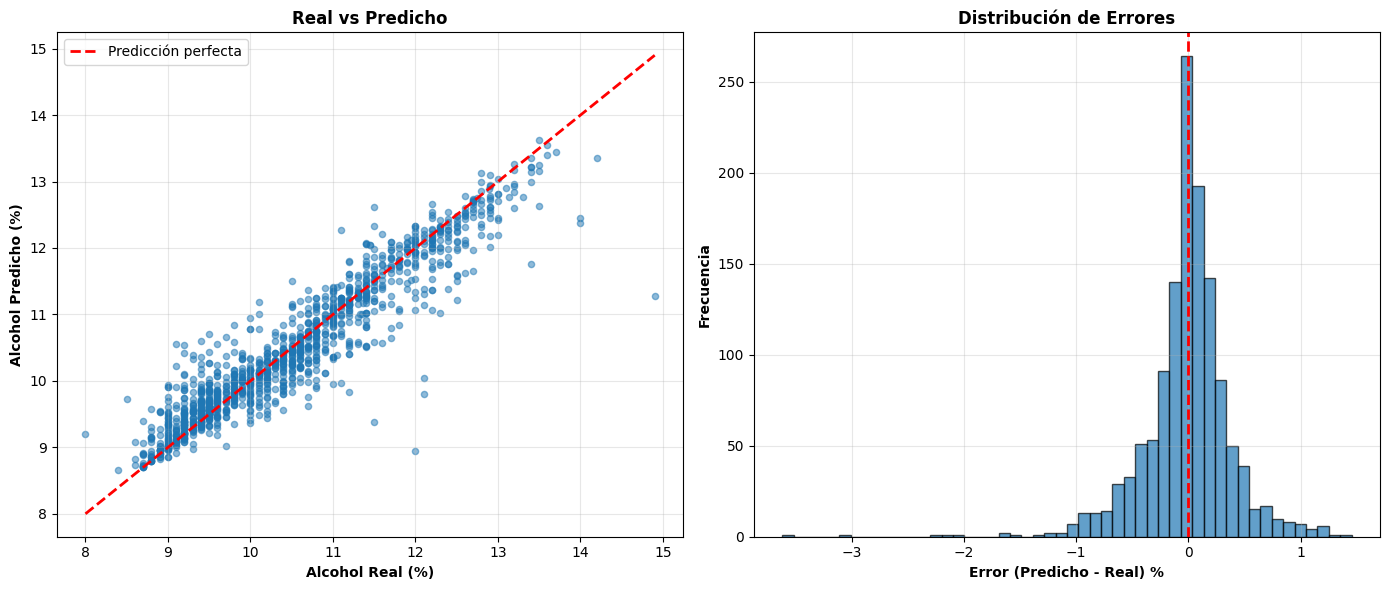


 GRÁFICOS:
   • Izquierda: Puntos cerca de la línea roja = buenas predicciones
   • Derecha: Campana centrada en 0 = errores balanceados



In [147]:
# Visualización: Real vs Predicho
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.5, s=20)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Alcohol Real (%)', fontweight='bold')
axes[0].set_ylabel('Alcohol Predicho (%)', fontweight='bold')
axes[0].set_title('Real vs Predicho', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Distribución de errores
errores = y_pred_reg - y_test_reg
axes[1].hist(errores, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Error (Predicho - Real) %', fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontweight='bold')
axes[1].set_title('Distribución de Errores', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
print("""
 GRÁFICOS:
   • Izquierda: Puntos cerca de la línea roja = buenas predicciones
   • Derecha: Campana centrada en 0 = errores balanceados
""")